# Section 1 - Accessing data sets using Python
_Complete the following Python tasks. Comments aren't required but they can be helpful in awarding partial credit if you fail to get the correct answer._

## Task 1: Reading local files into Python
* Reference:  `00-Importing-Local-Files.ipynb` in the `GettingData` repository. 
* In the interest of time, `1a`(_csv_) and `1b` (_Numpy_) are provided for you; **you must complete `1c` (_Pandas_)**.

### Task 1a: Importing a local csv file using base Python (_Demo_)
Read the contents of the tab-delimited file `SaraTheTurtle.txt` (located in the data folder) into a list of line items such that you can easily retrieve values in specific rows and columns. Use either Python's file object or the built-in csv module. 

_If you have trouble with the tab-delimited file, try using the comma-delimited version `SaraTheTurtle.csv`, though this will cost you a penalty._

Then report the value in the **10th row** (*excluding* the header data, i.e. the 11th row of the file) and **6th column**.

In [1]:
#Set the filename
theFilename = '../data/SaraTheTurtle.txt'

In [3]:
#Read the file into a list of line items
theDataLines = open(theFilename,'r').readlines()

#Create an empty list to hold the lines of data
theData = []

#Iterate through each line of text and add a list of values to theData list
for theLine in theDataLines:
    theData.append(theLine.strip().split('\t'))
    
#Alternatively, you can use the "list comprehension" technique
#theData = [theLine.strip().split('\t') for theLine in theDataLines]

In [4]:
#Reveal the value in the 10th row, 6th column
theData[10][5]

'33.965'

### Task 1b: Import using Numpy (_Demo_)
Read in the same dataset, but this time using the Numpy package to read the data into a Numpy array, skipping the header row. 

Reveal the item in the 10th row, 6th column.

In [5]:
#Read the file into a Numpy array
import numpy as np
theData = np.genfromtxt(
    fname=theFilename,
    delimiter='\t',
    skip_header=True)

In [6]:
#Reveal the value in the 10th row, 6th column
theData[9,5]

33.965

### ►Task 1c: Import using Pandas◄
Read in the same dataset, but this time using the Pandas package to read the data into a Pandas dataframe. 

After importing, reveal the item in the 10th row, 6th column (as above).

In [7]:
#Read the file into Pandas dataframe
import pandas as pd
pdData = pd.read_csv(theFilename)

In [9]:
#Reveal the value in the 10th row, 6th column
theData[9,5]

33.965

---
## Task 2. Reading remote text files into Python (using Pandas)
* Reference: `1a-Getting-data-with-Pandas.ipynb` in the `GettingData` repository. 

### Task 2a. Import NWIS discharge data located at a web address:
Using Pandas, read the **tab delimted** data located at the URL below into a dataframe:  
http://waterdata.usgs.gov/nwis/uv?cb_00060=on&cb_00065=on&format=rdb&begin_date=2018-10-10&end_date=2018-10-13&site_no=02085070. 



→ _Be sure to omit metadata lines (i.e. the lines that begin with "#") & the data format line just below the header line.  
&nbsp;&nbsp;&nbsp;&nbsp;(This is just as we did in the class exercise...)_

Finally, display the first 5 rows in this dataframe using the pandas `head()` command. 

In [12]:
#Assign a variable to the URL
theURL = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&begin_date=2018-10-10&end_date=2018-10-13&site_no=02085070'

In [13]:
#Read the remote data into a pandas dataframe, ommitting commented lines in the input file
df=pd.read_csv(theURL, delimiter='\t', comment='#')

In [14]:
#Drop the first row in the dataframe as it contains metadata, not data
df.drop(0,axis='rows',inplace=True)

In [11]:
#Show the first 5 records of the dataframe
df.head()

,agency_cd,site_no,datetime,tz_cd,89062_00060,89062_00060_cd
1,USGS,02085070,2018-10-10 00:00,EDT,27.8,A
2,USGS,02085070,2018-10-10 00:15,EDT,27.8,A
3,USGS,02085070,2018-10-10 00:30,EDT,27.8,A
4,USGS,02085070,2018-10-10 00:45,EDT,27.8,A
5,USGS,02085070,2018-10-10 01:00,EDT,27.8,A


### Plotting data (_Demo_)
The data you just obtained includes discharge data for the Eno River near Durham just as Hurricane Michael hit.  

As a reward for successfully importing your data, let's plot it. First, however, we need to make some tweaks to the data. The code below renames the cryptic USGS column names, converts the discharge  to floating point, and sets the dataframe's index to the datetime column, allowing us to construct lineplots..

In [21]:
#Reveal the data format of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 384 entries, 2018-10-10 00:00:00 to 2018-10-13 23:45:00
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   agency         384 non-null    object 
 1   site_no        384 non-null    object 
 2   datetime       384 non-null    object 
 3   tz_cd          384 non-null    object 
 4   Discharge_cfs  384 non-null    float64
 5   Discharge_cd   384 non-null    object 
dtypes: float64(1), object(5)
memory usage: 21.0+ KB


In [35]:
#Rename the columns
df.columns = ['agency','site_no','datetime','tz_cd','Discharge_cfs','Discharge_cd']

#Convert the data types of value columns
df['Discharge_cfs'] = df['Discharge_cfs'].astype('float')
#Set the index as the datetime column, converted to a datetime object
df.index = pd.to_datetime(df['datetime'])
df.head()

,agency,site_no,datetime,tz_cd,Discharge_cfs,Discharge_cd
datetime,,,,,,
2018-10-10 00:00:00,USGS,02085070,2018-10-10 00:00,EDT,27.8,A
2018-10-10 00:15:00,USGS,02085070,2018-10-10 00:15,EDT,27.8,A
2018-10-10 00:30:00,USGS,02085070,2018-10-10 00:30,EDT,27.8,A
2018-10-10 00:45:00,USGS,02085070,2018-10-10 00:45,EDT,27.8,A
2018-10-10 01:00:00,USGS,02085070,2018-10-10 01:00,EDT,27.8,A


Now we'll plot the data. Can you tell when the hurricane came through?

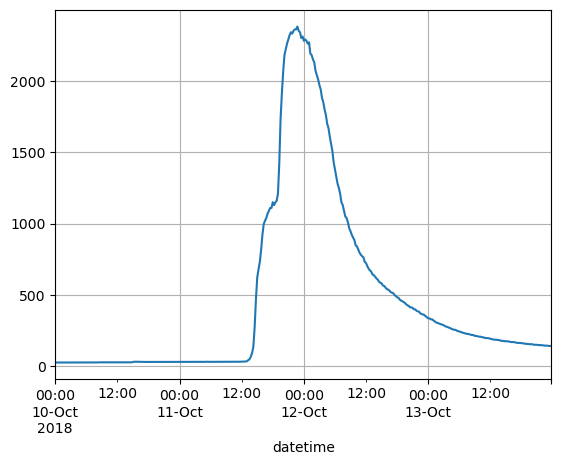

In [19]:
#Plot the discharge data
df['Discharge_cfs'].plot(grid=True);

### Task 2b. Saving a dataframe to a local csv file
Save your dataframe to a csv file named `NWISDischarge.csv` in your data folder. (You may opt to keep the index column in your output file or not...) 

In [20]:
#Save the file to a local csv
df.to_csv('../data/NWISDischarge.csv',index=False)

## Challenge

Create the same plot above, but for a gage near New Bern, NC (Gage ID: `02091814`) over the period that Hurricane Florence's impact was felt (Sept 11, 2018 - Oct 04, 2018).

In [47]:
theNURL = 'https://nwis.waterdata.usgs.gov/usa/nwis/uv/?cb_00060=on&format=rdb&begin_date=2018-09-11&end_date=2018-10-04&site_no=02091814'
dfN=pd.read_csv(theNURL, delimiter='\t', comment='#')
dfN.drop(0,axis='rows',inplace=True)
dfN.columns = ['agency','site_no','datetime','tz_cd','Discharge_cfs','Discharge_cd']

#Convert the data types of value columns
dfN['Discharge_cfs'] = dfN['Discharge_cfs'].astype('float')
#Set the index as the datetime column, converted to a datetime object
dfN.index = pd.to_datetime(dfN['datetime'])

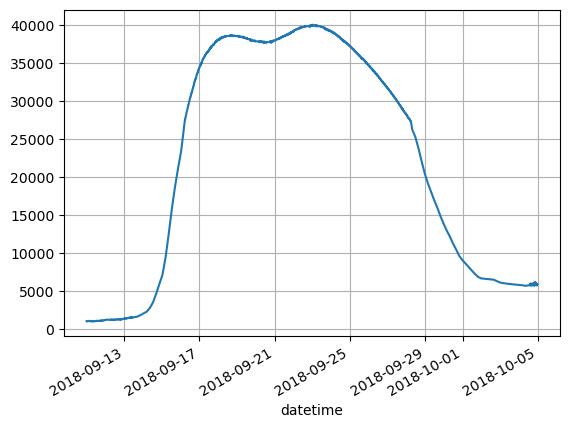

In [48]:
dfN['Discharge_cfs'].plot(grid=True);